In [3]:
t = var('t')
x = function('x')(t)
k = var('k')

de = diff(x, t) == -k * x

sol = desolve(de, x, ivar=t)
show(sol)

_C*e^(-k*t)

20*e^(-1/5*t)

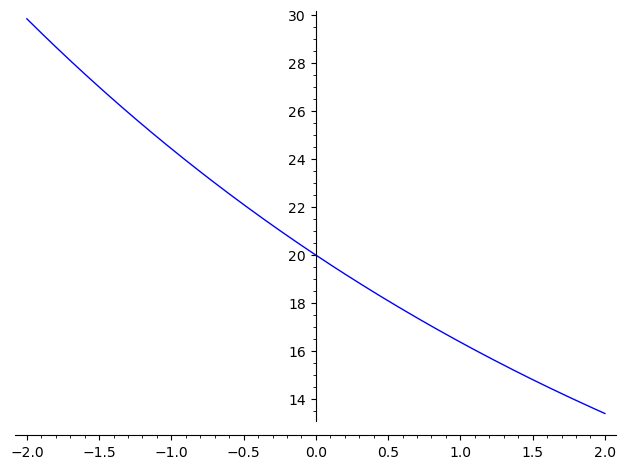

In [13]:
t = var('t')
x = function('x')(t)
k = 0.2

de = diff(x, t) == -k * x

sol = desolve(de, x, ics = [0, 20])
show(sol)

sol_ivp = desolve(de, x, ics=[0, 20])
plot(sol_ivp, (t, -2, 2))

In [5]:
from math import log
t_half_years = 700 * 10^6

k = log(2) / t_half_years

print("Decay constant k:", k)


Decay constant k: 9.90210257942779e-10


(_K2*t + _K1)*e^(3*t) + t

verbose 0 (3935: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3935: plot.py, generate_plot_points) Last error message: 'self must be a relation'


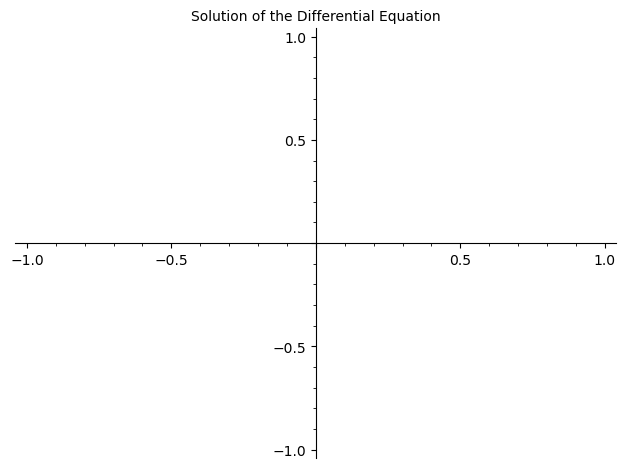

In [12]:
t = var('t')
x = function('x')(t)
eq = diff(x, t, 2) - 6*diff(x, t) + 9*x == 9*t - 6
sol = desolve(eq, x)
show(sol)

solution_func = lambda t: sol.subs(t=t).rhs().simplify()
plot(solution_func, (t, -2, 2), title='Solution of the Differential Equation', color='blue', plot_points=100)

In [29]:
from sympy import symbols, Function, Eq, diff, dsolve

t = symbols('t')
x = Function('x')(t)

eq = Eq(diff(x, t, t) - 6*diff(x, t) + 9*x, 9*t - 6)

a = var('a')
initial_conditions = {x.subs(t, 0): 0, diff(x, t).subs(t, 0): a}

solution = dsolve(eq, x, ics=initial_conditions)

print("Solution:")
print(solution)
#check if polynomial

is_polynomial = lambda s: all(s.is_polynomial(v) for v in s.variables())
w = var('w')
is_polynomial(w)
# is_second_part_polynomial = is_polynomial(solution[1].rhs)
# print(is_second_part_polynomial)


Solution:
Eq(x(t), t*(a - 1)*exp(3*t) + t)


True

In [42]:
B = matrix([[1, 0], [1, 2]])
det_B = B.determinant()
print("det B:")
print(det_B)

eigenval = B.eigenvalues()
print("Eigenvalues: ")
print(eigenval)

t = var('t')
expB = B.exp()
print("Matrix exponential e^(tB):")
show(expB)

real = [ev.real() for ev in eigenval]
if all(rp < 0 for rp in real):
    stability = "asymptotically"
elif all(rp > 0 for rp in real):
    stability = "unstable"
elif all(rp == 0 for rp in real):
    stability = "stable"
else:
    stability = "saddle"

print(stability)

det B:
2
Eigenvalues: 
[2, 1]
Matrix exponential e^(tB):


[      e       0]
[e^2 - e     e^2]

unstable


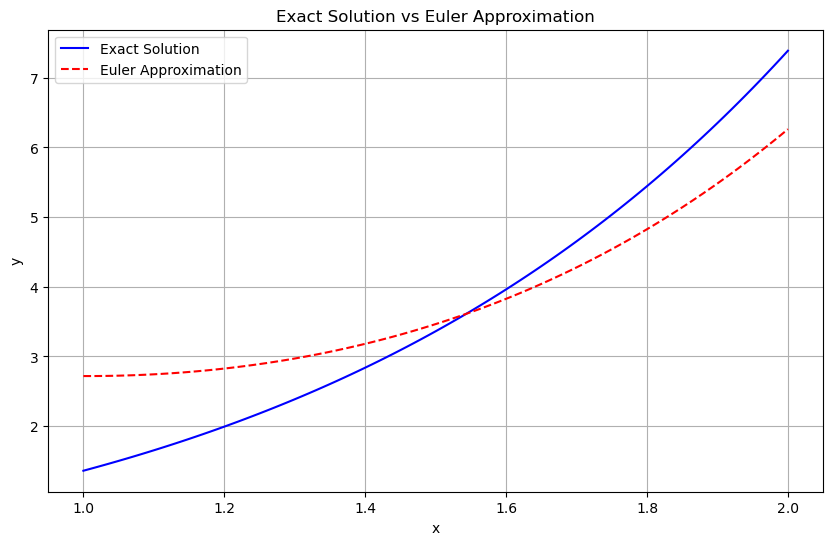

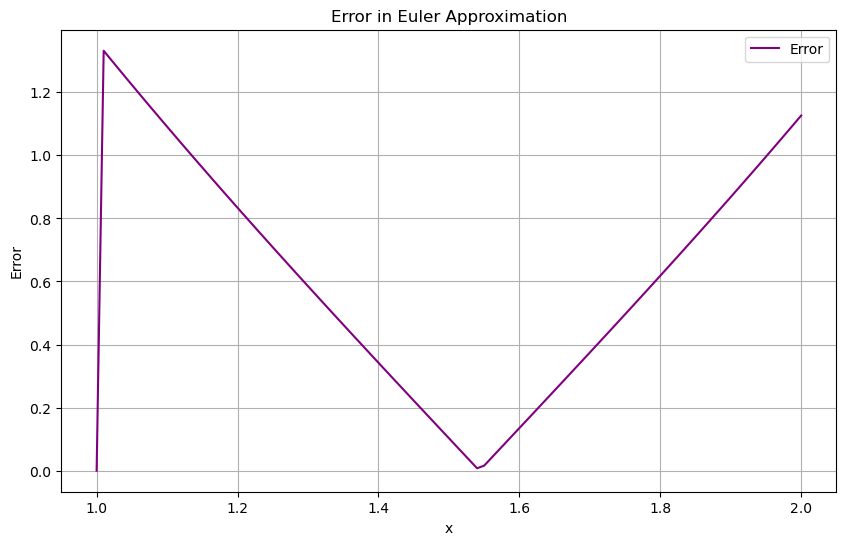

In [43]:
reset()
# y'(x) =  x * e^x - y(x), y(1) = e
x = var('x')
y = function('y')(x)
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return x * np.exp(x) - y

def exact_solution(x):
    return x * np.exp(x) / 2

x0 = 1
y0 = np.exp(1)
x_end = 2
n_steps = 100
h = (x_end - x0) / n_steps

x_values = np.linspace(x0, x_end, n_steps + 1)
y_approx = np.zeros(n_steps + 1)
y_exact = np.zeros(n_steps + 1)
errors = np.zeros(n_steps + 1)

y_approx[0] = y0
y_exact[0] = exact_solution(x0)

for i in range(n_steps):
    y_approx[i + 1] = y_approx[i] + h * f(x_values[i], y_approx[i])
    y_exact[i + 1] = exact_solution(x_values[i + 1])
    errors[i + 1] = abs(y_exact[i + 1] - y_approx[i + 1])

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_exact, label='Exact Solution', color='blue')
plt.plot(x_values, y_approx, label='Euler Approximation', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_values, errors, label='Error', color='purple')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


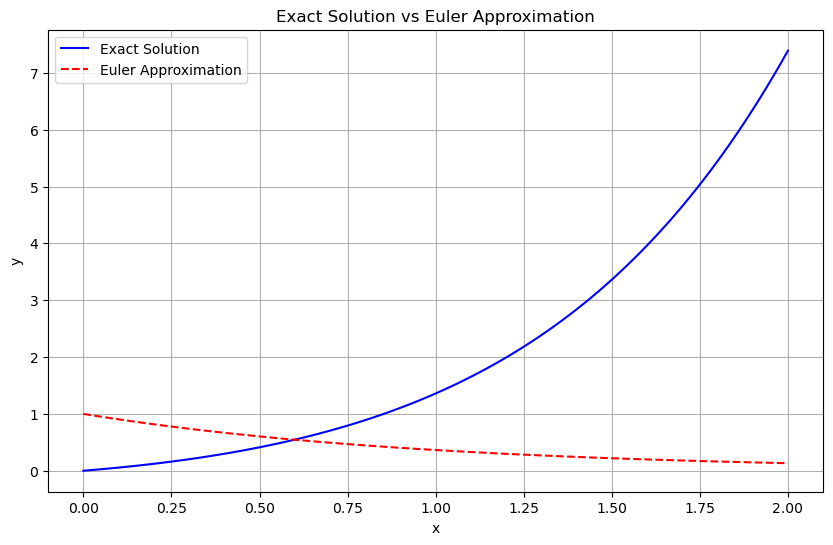

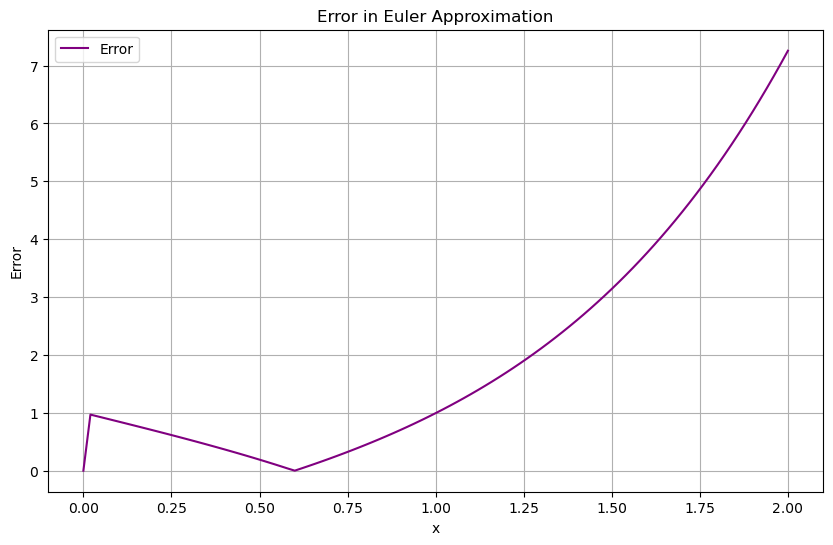

In [44]:
reset()
# y'(x) =  - y(x), y(0) = 1
x = var('x')
y = function('y')(x)
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return -y

def exact_solution(x):
    return x * np.exp(x) / 2

x0 = 0
y0 = 1
x_end = 2
n_steps = 100
h = (x_end - x0) / n_steps

x_values = np.linspace(x0, x_end, n_steps + 1)
y_approx = np.zeros(n_steps + 1)
y_exact = np.zeros(n_steps + 1)
errors = np.zeros(n_steps + 1)

y_approx[0] = y0
y_exact[0] = exact_solution(x0)

for i in range(n_steps):
    y_approx[i + 1] = y_approx[i] + h * f(x_values[i], y_approx[i])
    y_exact[i + 1] = exact_solution(x_values[i + 1])
    errors[i + 1] = abs(y_exact[i + 1] - y_approx[i + 1])

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_exact, label='Exact Solution', color='blue')
plt.plot(x_values, y_approx, label='Euler Approximation', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_values, errors, label='Error', color='purple')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()
